# IMPORT LIBRARIES

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# IMPORT DATASET

In [60]:
file_path = 'C:\\Users\\Nithya\\Desktop\\Major project\\Dataset\\diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

# DOWNSAMPLING

In [61]:
target_variable = 'Diabetes_012'
class_0 = df[df[target_variable] == 0]
class_1 = df[df[target_variable] == 1]
class_2 = df[df[target_variable] == 2]
downsampled_size = 4631
class_0_downsampled = class_0.sample(n=downsampled_size, random_state=42)
class_1_downsampled = class_1.sample(n=downsampled_size, random_state=42)
class_2_downsampled = class_2.sample(n=downsampled_size, random_state=42)
f_downsampled = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])
print(f_downsampled)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
162288           0.0     0.0       0.0        1.0  24.0     0.0     0.0   
227646           0.0     1.0       0.0        1.0  32.0     1.0     0.0   
888              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
230094           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
134829           0.0     0.0       0.0        1.0  35.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
66672            2.0     1.0       1.0        1.0  35.0     1.0     0.0   
42017            2.0     1.0       1.0        1.0  32.0     1.0     1.0   
67332            2.0     0.0       0.0        1.0  26.0     1.0     0.0   
251948           2.0     0.0       1.0        1.0  26.0     0.0     0.0   
171966           2.0     1.0       0.0        1.0  29.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
162288                   

# DOWNSAMPLED COUNT

In [62]:
print("Class Distribution in Downsampled Data:")
print(f_downsampled[target_variable].value_counts())
print("Unique Classes in Downsampled Data:", f_downsampled[target_variable].unique())
print("Class Distribution in Downsampled Data:", f_downsampled[target_variable].value_counts())

Class Distribution in Downsampled Data:
Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64
Unique Classes in Downsampled Data: [0. 1. 2.]
Class Distribution in Downsampled Data: Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# DATA SPLIT

In [63]:
X = f_downsampled.drop(target_variable, axis=1)  
y = f_downsampled[target_variable] 
test_size = 0.2  
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size , stratify=y)


# ARTIFICIAL NEURAL NETWORK

In [64]:
column_names = X.columns.tolist()
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy on the test set: {accuracy:.4f}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Epoch 1/10
348/348 [==============================] - 1s 2ms/step - loss: -23.0778 - accuracy: 0.4026 - val_loss: -110.7026 - val_accuracy: 0.4361
Epoch 2/10
348/348 [==============================] - 1s 2ms/step - loss: -535.5325 - accuracy: 0.4394 - val_loss: -1212.3253 - val_accuracy: 0.4383
Epoch 3/10
348/348 [==============================] - 1s 2ms/step - loss: -2466.2700 - accuracy: 0.4421 - val_loss: -4146.4624 - val_accuracy: 0.4397
Epoch 4/10
348/348 [==============================] - 1s 2ms/step - loss: -6503.6079 - accuracy: 0.4456 - val_loss: -9511.6768 - val_accuracy: 0.4444
Epoch 5/10
348/348 [==============================] - 1s 2ms/step - loss: -13109.7803 - accuracy: 0.4432 - val_loss: -17626.8867 - val_accuracy: 0.4354
Epoch 6/10
348/348 [==============================] - 1s 2ms/step - loss: -22623.4824 - accuracy: 0.4346 - val_loss: -28900.7930 - val_accuracy: 0.4275
Epoch 7/10
348/348 [==============================] - 1s 2ms/step - loss: -35309.3164 - accuracy: 0.

# DATA VISUALIZATION

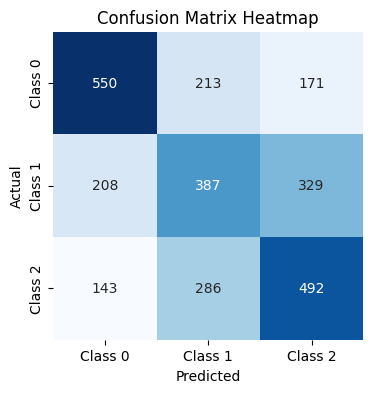

In [65]:
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# FEATURE RANKING

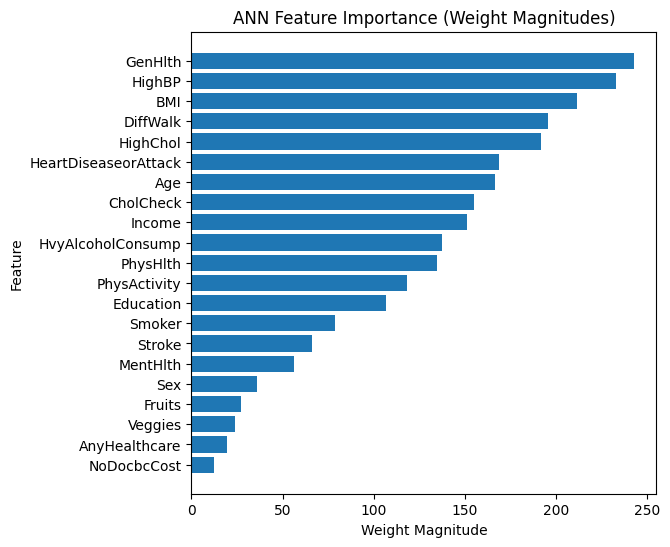

In [66]:
# Retrieve the weights and biases of the first layer
weights, biases = model.layers[0].get_weights()

# Calculate weight magnitudes
weight_magnitudes = np.sum(np.abs(weights), axis=1)  # Sum of absolute weights along the features

# Sort indices based on weight magnitudes
sorted_idx = np.argsort(weight_magnitudes)

# Map indices to feature names
sorted_feature_names = [column_names[i] for i in sorted_idx]

# Plot the feature importance with feature names
plt.figure(figsize=(6, 6))
plt.barh(range(len(sorted_idx)), weight_magnitudes[sorted_idx])
plt.yticks(range(len(sorted_idx)), sorted_feature_names)
plt.xlabel('Weight Magnitude')
plt.ylabel('Feature')
plt.title('ANN Feature Importance (Weight Magnitudes)')
plt.show()
